In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# load dataset
dataset = load_wine()

# preprocessing (normalization)
scaler = StandardScaler()
scaler.fit(dataset.data)
data = scaler.transform(dataset.data)

Text(0,0.5,'2nd eigenvector')

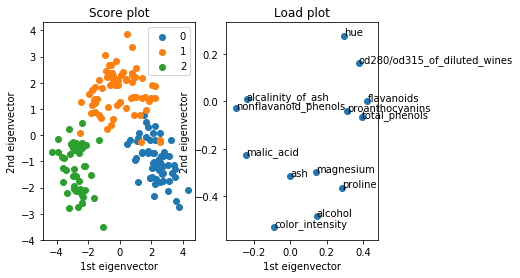

In [3]:
# exploratory analysis using PCA
pca = PCA()
pca.fit(data)
X = pca.transform(data)

fig, (ax1, ax2) = plt.subplots(1,2)
for ii in range(3):
    ax1.scatter(X[dataset.target == ii,0], X[dataset.target == ii,1], label=ii)

ax1.legend()
ax1.set_title("Score plot")
ax1.set_xlabel("1st eigenvector")
ax1.set_ylabel("2nd eigenvector")

# loadings
I = np.identity(dataset.data.shape[1]);
YI = pca.transform(I)
x_ = YI[:,0]
#y_ = np.zeros_like(y[:,0])
y_ = YI[:,1]

ax2.scatter(x_, y_)
for ii in range(len(dataset.feature_names)):
    ax2.text(x_[ii], y_[ii], dataset.feature_names[ii])

ax2.set_title("Load plot")
ax2.set_xlabel("1st eigenvector")
ax2.set_ylabel("2nd eigenvector")


<Container object of 13 artists>

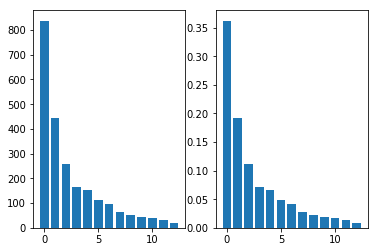

In [4]:
# Eigenspectrum
fig = plt.figure()
ax1, ax2 = fig.subplots(1,2)
ax1.bar(range(0,dataset.data.shape[1]), pca.singular_values_**2)
ax2.bar(range(0,dataset.data.shape[1]), pca.explained_variance_ratio_)

In [5]:
th = 0.95
idx = np.argmax(np.cumsum(pca.explained_variance_ratio_) > th)
print('Need %d components to collect %.2f%% variance (%.2f%%)' 
      % (idx, th, np.sum(pca.explained_variance_ratio_[:idx+1])))

Need 9 components to collect 0.95% variance (0.96%)


In [6]:
# I can directly set PCA to reach for 95% variance
pca = PCA(th)
pca.fit(data)
X = pca.transform(data)
print('Found %d components to collect %.2f%% variance (%.2f%%)' 
      % (pca.n_components_, th, np.sum(pca.explained_variance_ratio_)))

Found 10 components to collect 0.95% variance (0.96%)


In [7]:
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, dataset.target,
                                                    test_size=0.33, random_state=42)
svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(svc.predict(X_test), y_test)

array([[20,  0,  0],
       [ 0, 24,  1],
       [ 0,  0, 14]])